# Portfolio Optimisation

The focus of this notebook is going to walking through an example of constructing an Efficient Frontier - a key part of Modern Portfolio Theory!

## Part 1: Importing the libraries and data

In [1]:
#First we want to import the libraries necessary for computing returns, risk, and plotting our graphs

import numpy as np
import pandas as pd
import yfinance as yf

#These imports are all related to plotting our graphs, so we dont need to worry too much about these!

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

In [5]:
#Lets now retrieve our historical financial data that we are going to use

tickers = 'MSFT AAPL AMZN NVDA GOOGL META JPM PG JNJ ADBE SPY' #Tickers so yfinance knows what stocks to get data for
df = yf.download(tickers = tickers, start = '2013-01-01', end = '2023-01-01', interval = '1d') #Parameters for yfinance
df.head()

[*********************100%***********************]  11 of 11 completed


Price                      Adj Close                                 \
Ticker                          AAPL       ADBE     AMZN      GOOGL   
Date                                                                  
2013-01-02 00:00:00+00:00  16.705700  38.340000  12.8655  18.054642   
2013-01-03 00:00:00+00:00  16.494831  37.750000  12.9240  18.065128   
2013-01-04 00:00:00+00:00  16.035383  38.130001  12.9575  18.422102   
2013-01-07 00:00:00+00:00  15.941052  37.939999  13.4230  18.341719   
2013-01-08 00:00:00+00:00  15.983966  38.139999  13.3190  18.305523   

Price                                                                  \
Ticker                           JNJ        JPM       META       MSFT   
Date                                                                    
2013-01-02 00:00:00+00:00  51.169811  32.313248  27.915949  22.451815   
2013-01-03 00:00:00+00:00  51.097591  32.248142  27.686640  22.151047   
2013-01-04 00:00:00+00:00  51.682671  32.819721  28.673666  21.736477   
2013-01-07 00:00:00+00:00  51.574310  32.855904  29.331686  21.695833   
2013-01-08 00:00:00+00:00  51.581554  32.921017  28.972765  21.582026   

Price                                           ...   Volume            \
Ticker                         NVDA         PG  ...     ADBE      AMZN   
Date                                            ...                      
2013-01-02 00:00:00+00:00  0.293535  49.248253  ...  6483800  65420000   
2013-01-03 00:00:00+00:00  0.293766  48.935982  ...  3906000  55018000   
2013-01-04 00:00:00+00:00  0.303458  49.035339  ...  3809300  37484000   
2013-01-07 00:00:00+00:00  0.294689  48.701759  ...  3632100  98200000   
2013-01-08 00:00:00+00:00  0.288227  48.623692  ...  3080900  60214000   

Price                                                                         \
Ticker                         GOOGL       JNJ       JPM      META      MSFT   
Date                                                                           
2013-01-02 00:00:00+00:00  101550348  12874200  31413000  69846400  52899300   
2013-01-03 00:00:00+00:00   92635272   9598300  24227700  63140600  48294400   
2013-01-04 00:00:00+00:00  110429460  11631800  24487700  72715400  52521100   
2013-01-07 00:00:00+00:00   66161772   7548800  24456900  83781800  37110400   
2013-01-08 00:00:00+00:00   66976956   9825300  19624200  45871300  44703100   

Price                                                     
Ticker                          NVDA       PG        SPY  
Date                                                      
2013-01-02 00:00:00+00:00  478836000  9987000  192059000  
2013-01-03 00:00:00+00:00  298888000  7741900  144761800  
2013-01-04 00:00:00+00:00  524968000  5853700  116817700  
2013-01-07 00:00:00+00:00  610732000  5269800  110002500  
2013-01-08 00:00:00+00:00  466424000  7362000  121265100  

[5 rows x 66 columns]

We are going to be computing historical returns - which stock values do we care about most in this instance?

**Adjusted close!**

What does the 'adjusted' in adjusted close price actually mean?

**Adjusted close price just means the stock's close price that has been modified to include the effects of corporate actions i.e.**
- **Stock splits**
- **Dividend payouts**



In [6]:
#Here we only retrieve the adjusted close price, and then resample to get the adjusted close price for the last day of each year

df = df.xs('Adj Close', axis = 1) #.xs will select only the adjusted close values for each stock
df = df.resample('YE').last() #.resample will adjust the frequency of our time-series data, and in this case retrieve only the last close value of each stock, each year
df

Ticker,AAPL,ADBE,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,PG,SPY
Date,,,,,,,,,,,
2013-12-31 00:00:00+00:00,17.499363,59.880001,19.939501,27.976521,68.167435,43.203560,54.485950,31.330099,0.377765,59.577328,152.706390
2014-12-31 00:00:00+00:00,24.608044,72.699997,15.517500,26.467463,79.985863,47.473289,77.785789,39.966122,0.481257,68.766479,173.266464
2015-12-31 00:00:00+00:00,23.866428,93.940002,33.794498,38.804413,80.899445,51.448009,104.345833,49.035187,0.804255,61.910748,175.405090
2016-12-31 00:00:00+00:00,26.845057,102.949997,37.493500,39.524635,93.300667,69.216301,114.704643,56.428581,2.629593,67.705780,196.449997
2017-12-31 00:00:00+00:00,39.855339,175.240005,58.473499,52.539902,116.089584,87.737724,175.930298,79.412285,4.785542,76.301186,239.090302
2018-12-31 00:00:00+00:00,37.707054,226.240005,75.098503,52.118946,110.132462,81.926140,130.696487,95.926323,3.310865,79.024780,228.166260
2019-12-31 00:00:00+00:00,71.250443,329.809998,92.391998,66.804085,127.996010,120.642021,204.633881,151.139664,5.858346,110.397995,299.408661
2020-12-31 00:00:00+00:00,129.894318,500.119995,162.846497,87.415550,141.849869,113.964760,272.340027,215.425522,13.022851,126.022118,354.295044
2021-12-31 00:00:00+00:00,174.900375,567.059998,166.716995,144.494217,158.074814,145.585114,335.340332,328.474213,29.364189,151.884384,456.079681


To plot our efficient frontier, we are going to need

In [8]:
#We want to calculate the historical annual returns of each of our stock, to ultimately be used as a predictor for future returns

annual_returns = df.apply(lambda x: x.pct_change()).dropna() #Calculate the annual percentage change of each stock (from the last day of each year) and put this in a new df
annual_returns

Ticker,AAPL,ADBE,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,PG,SPY
Date,,,,,,,,,,,
2014-12-31 00:00:00+00:00,0.406225,0.214095,-0.221771,-0.053940,0.173374,0.098828,0.427630,0.275646,0.273958,0.154239,0.134638
2015-12-31 00:00:00+00:00,-0.030137,0.292160,1.177831,0.466118,0.011422,0.083725,0.341451,0.226919,0.671155,-0.099696,0.012343
2016-12-31 00:00:00+00:00,0.124804,0.095912,0.109456,0.018560,0.153292,0.345364,0.099274,0.150777,2.269603,0.093603,0.119979
2017-12-31 00:00:00+00:00,0.484644,0.702186,0.559564,0.329295,0.244252,0.267588,0.533768,0.407306,0.819879,0.126952,0.217054
2018-12-31 00:00:00+00:00,-0.053902,0.291029,0.284317,-0.008012,-0.051315,-0.066238,-0.257112,0.207953,-0.308152,0.035695,-0.045690
2019-12-31 00:00:00+00:00,0.889579,0.457788,0.230277,0.281762,0.162201,0.472571,0.565718,0.575581,0.769430,0.397005,0.312239
2020-12-31 00:00:00+00:00,0.823067,0.516388,0.762561,0.308536,0.108237,-0.055348,0.330865,0.425341,1.222957,0.141525,0.183316
2021-12-31 00:00:00+00:00,0.346482,0.133848,0.023768,0.652958,0.114381,0.277457,0.231330,0.524769,1.254820,0.205220,0.287288
2022-12-31 00:00:00+00:00,-0.264042,-0.406535,-0.496152,-0.390896,0.059749,-0.126412,-0.642218,-0.280248,-0.502646,-0.050480,-0.181754


In [9]:
#Calculate the mean of all our stock's annual returns over the years, to serve as our (bad and limited) predictor for future expected return!

ann_return = annual_returns.mean() #Our model here is just taking the mean of our historical annual returns, and setting this as our future returns
ann_return #This will serve as our future return

,0
Ticker,
AAPL,0.302969
ADBE,0.255208
AMZN,0.269983
GOOGL,0.178265
JNJ,0.108399
JPM,0.144171
META,0.181190
MSFT,0.279338
NVDA,0.719000


To clarify what we are doing here:
- Alex discussed several ways to predict (forecast) future returns for our stocks
- And based off these forecasted returns, there are several ways to optimise our portfolio (MC simulations, BL model)


In this case, we are taking the mean of our historical annual returns, and **assuming** this will be our future returns

We are then going to run Monte Carlo (random) simulations, and see which asset combination gives us the highest Sharpe



In [10]:
#Calculate a covariance matrix based on our historical annual returns dataframe, for use when calculating risk later on!

ann_cov = annual_returns.cov()
ann_cov

#Output is a covariance matrix
#Notice anything about this matrix
#What do the diagonal terms represent

Ticker,AAPL,ADBE,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,PG,SPY
Ticker,,,,,,,,,,,
AAPL,0.156467,0.088107,0.047437,0.059294,0.021502,0.040652,0.122451,0.083299,0.135788,0.048354,0.054777
ADBE,0.088107,0.098924,0.108345,0.060060,0.010490,0.024063,0.100815,0.064000,0.082881,0.019872,0.033466
AMZN,0.047437,0.108345,0.258455,0.102682,-0.007070,0.003877,0.101278,0.054918,0.123906,-0.012752,0.016794
GOOGL,0.059294,0.060060,0.102682,0.099594,0.004522,0.030513,0.086079,0.065450,0.133629,0.014842,0.036305
JNJ,0.021502,0.010490,-0.007070,0.004522,0.008113,0.011748,0.021965,0.009058,0.036045,0.007557,0.009632
JPM,0.040652,0.024063,0.003877,0.030513,0.011748,0.043041,0.053037,0.032571,0.110200,0.021147,0.025891
META,0.122451,0.100815,0.101278,0.086079,0.021965,0.053037,0.157541,0.085808,0.171126,0.033647,0.054181
MSFT,0.083299,0.064000,0.054918,0.065450,0.009058,0.032571,0.085808,0.065401,0.099335,0.027901,0.038243
NVDA,0.135788,0.082881,0.123906,0.133629,0.036045,0.110200,0.171126,0.099335,0.713247,0.040048,0.084807


Checkpoint:
- We have calculate our future returns for our assets
- We have a covariance matrix that can be used when calculating the risk of our portfolio

**Next thing to do is run some simulations!**

## Part 2: Creating our portfolios to plot


We are going to produce 10000 random portfolios based on our calculated future returns and variance data
- We will assess each portfolios performance graphically in return-risk space

In [11]:
#First we set how many assets we want in our portfolio and the amount of portfolios we want to generate

n_assets = 7 #Must be less than or equal to number of assets in our portfolio
n_portfolios = 10000 #Number of portfolios being created
np.random.seed(75) #For the random weight generation


Link for more information the equations used:

https://quant.stackexchange.com/questions/43442/portfolio-variance-explanation-for-equation-investments-by-zvi-bodie

In [13]:
#This code includes a loop to generate portfolios, creating expected return and variance for each one

asset_list = [] #What might these lists be for?
weights_list = []
mean = []
variance = [] #These lists are to store the attributes of every portfolio generated

#This loop is for every portfolio(n)

for n in range(n_portfolios): #For loop of length number of portfolios

    assets = np.random.choice(list(annual_returns.columns), n_assets, replace = False) #This randomly selects 7 elements from our total list of stocks, for portfolio(n), and replace = False ensures no duplicate assets
    asset_list.append(assets) #We append our list assets for portfolio(n) to our global asset_list

    weights = np.random.rand(n_assets) #This generates an array of random numbers, between 0 and 1, with the length of n_assets (in our case 7)
    weights = (weights / sum(weights)).round(4) #This then performs divides each element in our array by the sum of all elements in the array, and then round it to 4 (which is actually 2dp because 0.4245 = 42.45% weighting)
    weights_list.append(weights) #Similiar to before, we append our list of weights to our global weights list

    port_exp_ret = 0 #Resets the return and variance of the portfolio for each iteration
    port_exp_var = 0

    #This loop is now for each individual asset within our portfolio(n)

    for i in range(len(assets)): #For asset(i) within portfolio(n)
        port_exp_ret += weights[i] * ann_return.loc[assets[i]] #Iterating through each asset in the portfolio and adding the assets weighted return to the overall portfolio return

        for j in range(len(assets)):
            port_exp_var += weights[i] * weights[j] * ann_cov.loc[assets[i], assets[j]] #This calculates our variance of asset(i) with all other assets in the portfolio, for every asset!

    mean.append(port_exp_ret) #Like before we add our mean and variance for our portfolio to our global lists
    variance.append(port_exp_var)

The equation for variance is as follows:

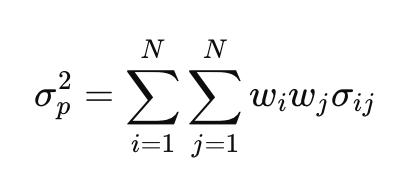

This relates to our loop, where we are multiplying the weights of asset(i) and asset (j), and then by their covariance

Here we can investigate what each list contains:

In [14]:
asset_list

[array(['JPM', 'MSFT', 'SPY', 'JNJ', 'AMZN', 'META', 'PG'], dtype='<U5'),
 array(['ADBE', 'AMZN', 'GOOGL', 'JPM', 'MSFT', 'META', 'SPY'], dtype='<U5'),
 array(['META', 'NVDA', 'JNJ', 'GOOGL', 'JPM', 'SPY', 'AMZN'], dtype='<U5'),
 array(['JPM', 'MSFT', 'AAPL', 'AMZN', 'NVDA', 'ADBE', 'JNJ'], dtype='<U5'),
 array(['AAPL', 'GOOGL', 'MSFT', 'PG', 'NVDA', 'META', 'JNJ'], dtype='<U5'),
 array(['MSFT', 'JPM', 'SPY', 'GOOGL', 'PG', 'AAPL', 'META'], dtype='<U5'),
 array(['JNJ', 'SPY', 'NVDA', 'PG', 'GOOGL', 'META', 'ADBE'], dtype='<U5'),
 array(['AMZN', 'PG', 'AAPL', 'NVDA', 'META', 'JPM', 'JNJ'], dtype='<U5'),
 array(['META', 'AAPL', 'JNJ', 'NVDA', 'ADBE', 'JPM', 'MSFT'], dtype='<U5'),
 array(['NVDA', 'SPY', 'JNJ', 'AAPL', 'GOOGL', 'META', 'JPM'], dtype='<U5'),
 array(['MSFT', 'GOOGL', 'PG', 'AMZN', 'JNJ', 'SPY', 'ADBE'], dtype='<U5'),
 array(['PG', 'NVDA', 'SPY', 'JPM', 'MSFT', 'JNJ', 'META'], dtype='<U5'),
 array(['NVDA', 'PG', 'MSFT', 'GOOGL', 'AAPL', 'JNJ', 'AMZN'], dtype='<U5'),
 array(['

In [15]:
print(len(asset_list))

10000


In [16]:
weights_list

[array([0.1368, 0.0472, 0.1554, 0.094 , 0.2347, 0.1629, 0.1689]),
 array([0.2122, 0.1616, 0.0425, 0.1268, 0.2025, 0.0633, 0.1911]),
 array([0.1968, 0.2364, 0.1887, 0.0098, 0.0843, 0.0252, 0.2588]),
 array([0.1752, 0.1463, 0.1032, 0.161 , 0.0041, 0.2269, 0.1833]),
 array([0.1484, 0.0404, 0.1617, 0.1825, 0.0181, 0.1755, 0.2734]),
 array([0.2822, 0.0418, 0.0477, 0.1217, 0.0461, 0.2511, 0.2094]),
 array([0.3119, 0.1829, 0.2146, 0.1173, 0.0821, 0.0566, 0.0347]),
 array([0.0484, 0.3312, 0.0738, 0.3044, 0.1981, 0.0273, 0.017 ]),
 array([0.2314, 0.0625, 0.1604, 0.1171, 0.1575, 0.0264, 0.2448]),
 array([0.2133, 0.1377, 0.1721, 0.2139, 0.1468, 0.0144, 0.1018]),
 array([0.1204, 0.1875, 0.2372, 0.2193, 0.0595, 0.0654, 0.1107]),
 array([0.2197, 0.0743, 0.0465, 0.0042, 0.2171, 0.247 , 0.1911]),
 array([0.2541, 0.1199, 0.0095, 0.19  , 0.1731, 0.0027, 0.2507]),
 array([0.2372, 0.059 , 0.1838, 0.1275, 0.1519, 0.0217, 0.2188]),
 array([0.144 , 0.0991, 0.0739, 0.1129, 0.1164, 0.34  , 0.1138]),
 array([0.

We want our data to be organised in a hassle free way, so we can easily plot and manipulate our data

**For this reason we will put it all into a dataframe!**

In [17]:
#Creating our dataframe - here we see why all our lists were so useful!

plot_data = pd.DataFrame(index = range(n_portfolios), data = zip(mean, variance, asset_list, weights_list),
                         columns = ['Return', 'Variance', 'Asset List', 'Asset Weights']) #Creating our dataframe and passing in all our lists
plot_data

,Return,Variance,Asset List,Asset Weights
0,0.172768,0.044189,"[JPM, MSFT, SPY, JNJ, AMZN, META, PG]","[0.1368, 0.0472, 0.1554, 0.094, 0.2347, 0.1629..."
1,0.213747,0.058103,"[ADBE, AMZN, GOOGL, JPM, MSFT, META, SPY]","[0.2122, 0.1616, 0.0425, 0.1268, 0.2025, 0.063..."
2,0.312767,0.119671,"[META, NVDA, JNJ, GOOGL, JPM, SPY, AMZN]","[0.1968, 0.2364, 0.1887, 0.0098, 0.0843, 0.025..."
3,0.221584,0.047979,"[JPM, MSFT, AAPL, AMZN, NVDA, ADBE, JNJ]","[0.1752, 0.1463, 0.1032, 0.161, 0.0041, 0.2269..."
4,0.192141,0.045115,"[AAPL, GOOGL, MSFT, PG, NVDA, META, JNJ]","[0.1484, 0.0404, 0.1617, 0.1825, 0.0181, 0.175..."
...,...,...,...,...
9995,0.211639,0.070610,"[ADBE, META, GOOGL, SPY, AAPL, AMZN, MSFT]","[0.0591, 0.059, 0.2109, 0.2434, 0.1164, 0.2206..."
9996,0.294711,0.106586,"[JNJ, ADBE, AAPL, GOOGL, JPM, META, NVDA]","[0.0712, 0.1038, 0.234, 0.0957, 0.1298, 0.2026..."
9997,0.214900,0.054214,"[PG, ADBE, META, AMZN, NVDA, JPM, JNJ]","[0.0084, 0.1444, 0.103, 0.1082, 0.0698, 0.4938..."
9998,0.256001,0.075626,"[JNJ, GOOGL, PG, ADBE, AAPL, NVDA, AMZN]","[0.1034, 0.1467, 0.0923, 0.2305, 0.1253, 0.067..."


In [18]:
#Calculate the Sharpe Ratio for each portfolio, and add this data to our dataframe for plotting

plot_data['Sharpe Ratio'] = (plot_data['Return'] - 0.05) / plot_data['Variance']**0.5 #What might 0.05 mean here? What about the **0.5?
plot_data

,Return,Variance,Asset List,Asset Weights,Sharpe Ratio
0,0.172768,0.044189,"[JPM, MSFT, SPY, JNJ, AMZN, META, PG]","[0.1368, 0.0472, 0.1554, 0.094, 0.2347, 0.1629...",0.584018
1,0.213747,0.058103,"[ADBE, AMZN, GOOGL, JPM, MSFT, META, SPY]","[0.2122, 0.1616, 0.0425, 0.1268, 0.2025, 0.063...",0.679321
2,0.312767,0.119671,"[META, NVDA, JNJ, GOOGL, JPM, SPY, AMZN]","[0.1968, 0.2364, 0.1887, 0.0098, 0.0843, 0.025...",0.759587
3,0.221584,0.047979,"[JPM, MSFT, AAPL, AMZN, NVDA, ADBE, JNJ]","[0.1752, 0.1463, 0.1032, 0.161, 0.0041, 0.2269...",0.783338
4,0.192141,0.045115,"[AAPL, GOOGL, MSFT, PG, NVDA, META, JNJ]","[0.1484, 0.0404, 0.1617, 0.1825, 0.0181, 0.175...",0.669206
...,...,...,...,...,...
9995,0.211639,0.070610,"[ADBE, META, GOOGL, SPY, AAPL, AMZN, MSFT]","[0.0591, 0.059, 0.2109, 0.2434, 0.1164, 0.2206...",0.608294
9996,0.294711,0.106586,"[JNJ, ADBE, AAPL, GOOGL, JPM, META, NVDA]","[0.0712, 0.1038, 0.234, 0.0957, 0.1298, 0.2026...",0.749556
9997,0.214900,0.054214,"[PG, ADBE, META, AMZN, NVDA, JPM, JNJ]","[0.0084, 0.1444, 0.103, 0.1082, 0.0698, 0.4938...",0.708218
9998,0.256001,0.075626,"[JNJ, GOOGL, PG, ADBE, AAPL, NVDA, AMZN]","[0.1034, 0.1467, 0.0923, 0.2305, 0.1253, 0.067...",0.749086


Sharpe Ratio formula... incase we forgot!

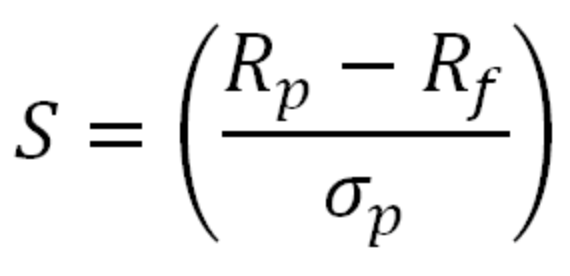

In [19]:
len(plot_data) #Check the length of our dataframe

10000

## Part 3:Plotting the Efficient Frontier graph


Using plotly we can make excellent interactive graphs to display our different portfolios

In [20]:
fig = go.Figure() #Creates an instance of go (graph object) similiar to figure = plt.figure

plot_data['HoverText'] = [
    f"Assets: {assets}<br>Weights: {weights}<br>Annualised Return: {mean}<br>Annualised Risk: {variance}"
    for assets, weights, mean, variance in zip(plot_data['Asset List'], plot_data['Asset Weights'], plot_data['Return'], plot_data['Variance']**0.5)
]

fig.add_trace(go.Scatter(x=plot_data['Variance']**0.5, y=plot_data['Return'], #Note our x axis becomes standard deviation so is square rooted
                      marker=dict(color=plot_data['Sharpe Ratio'], #Mark each point by its sharpe ratio
                                  showscale=True, #Parameters for the marker
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ),
                      mode='markers', text=plot_data['HoverText'],  # Pass the formatted text
    hovertemplate="%{text}<extra></extra>"))

fig.update_layout(template='plotly_white', #Generic formatting
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Random Portfolios',
                  width=1250,
                  height=900)

fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

Output hidden; open in https://colab.research.google.com to view.

# Data Analysis on our Portfolios

By utilising the versatility of Pandas and DataFrames, we can extract meaningful insights on our different portfolios

In [21]:
#We can search for max values from our dataframe

plot_data['Sharpe Ratio'].idxmax() #.idxmax locates the row with the maximum sharpe ratio

4377

In [22]:
#What if we want to know more about our portfolio with the highest sharpe ratio?

plot_data.iloc[plot_data['Sharpe Ratio'].idxmax()] #Outputs the related info

,4377
Return,0.298501
Variance,0.06696
Asset List,"[JPM, ADBE, MSFT, PG, NVDA, AMZN, JNJ]"
Asset Weights,"[0.0422, 0.0855, 0.3757, 0.1054, 0.182, 0.0022..."
Sharpe Ratio,0.960333
HoverText,Assets: ['JPM' 'ADBE' 'MSFT' 'PG' 'NVDA' 'AMZN...


In [23]:
#We can also search for portfolios with risk (standard deviation of our portfolio) below a certain level, and then order them by which metric we want!

plot_data[plot_data['Variance']**0.5 < 0.3].sort_values('Sharpe Ratio', axis =0, ascending = False) #Square rooting our variance to get standard deviation

#Here we are ordering our portfolios by the best sharpe ratio at a volatility (standard deviation) of less than 30%

,Return,Variance,Asset List,Asset Weights,Sharpe Ratio,HoverText
4377,0.298501,0.066960,"[JPM, ADBE, MSFT, PG, NVDA, AMZN, JNJ]","[0.0422, 0.0855, 0.3757, 0.1054, 0.182, 0.0022...",0.960333,Assets: ['JPM' 'ADBE' 'MSFT' 'PG' 'NVDA' 'AMZN...
9258,0.265260,0.051857,"[AMZN, ADBE, PG, JPM, JNJ, NVDA, MSFT]","[0.0733, 0.0946, 0.1835, 0.0443, 0.2102, 0.140...",0.945284,Assets: ['AMZN' 'ADBE' 'PG' 'JPM' 'JNJ' 'NVDA'...
2004,0.324403,0.084476,"[ADBE, NVDA, AAPL, JNJ, AMZN, PG, MSFT]","[0.0102, 0.229, 0.0478, 0.1691, 0.0773, 0.16, ...",0.944109,Assets: ['ADBE' 'NVDA' 'AAPL' 'JNJ' 'AMZN' 'PG...
1550,0.300849,0.071056,"[JNJ, PG, ADBE, AAPL, JPM, MSFT, NVDA]","[0.1789, 0.2205, 0.0546, 0.0125, 0.0059, 0.321...",0.941050,Assets: ['JNJ' 'PG' 'ADBE' 'AAPL' 'JPM' 'MSFT'...
8686,0.272814,0.056274,"[MSFT, JNJ, GOOGL, PG, NVDA, ADBE, AAPL]","[0.2779, 0.262, 0.0624, 0.1181, 0.1528, 0.1213...",0.939266,Assets: ['MSFT' 'JNJ' 'GOOGL' 'PG' 'NVDA' 'ADB...
...,...,...,...,...,...,...
836,0.153069,0.050321,"[JPM, PG, META, AMZN, SPY, GOOGL, ADBE]","[0.0555, 0.1894, 0.26, 0.0354, 0.2681, 0.1633,...",0.459463,Assets: ['JPM' 'PG' 'META' 'AMZN' 'SPY' 'GOOGL...
7462,0.155035,0.052937,"[META, AAPL, JPM, AMZN, PG, JNJ, SPY]","[0.3695, 0.0145, 0.2589, 0.0415, 0.2751, 0.030...",0.456513,Assets: ['META' 'AAPL' 'JPM' 'AMZN' 'PG' 'JNJ'...
8676,0.163713,0.063866,"[AAPL, PG, GOOGL, SPY, META, JPM, ADBE]","[0.0746, 0.2214, 0.0025, 0.1906, 0.3879, 0.069...",0.449961,Assets: ['AAPL' 'PG' 'GOOGL' 'SPY' 'META' 'JPM...
7246,0.138011,0.039043,"[MSFT, JNJ, GOOGL, SPY, JPM, PG, META]","[0.0117, 0.1542, 0.0179, 0.2717, 0.1183, 0.155...",0.445420,Assets: ['MSFT' 'JNJ' 'GOOGL' 'SPY' 'JPM' 'PG'...


## Extra: Improving the graph and adding features

How could we improve our graph / make it easier to only look at the **best** portfolios?
- Add a 'dominating' condition

What do we mean by a 'dominating' condition?

Theres are lots of portfolios below the efficient frontier, so we may as well get rid of these!
- If two portfolios have equal return, we will chose the one with less risk, and similiarly at the same risk level we want the most return

In [24]:
#Same code as before, but the variables have an _2 so previous lines of code can be ran / messed around with without variables issues

n_assets_2 = 7
n_portfolios_2 = 10000

asset_list_2 = []
weights_list_2 = []
mean_2 = []
variance_2 = []

for n in range(n_portfolios_2):

    assets = np.random.choice(list(annual_returns.columns), n_assets_2, replace = False)
    asset_list_2.append(assets)

    weights = np.random.rand(n_assets_2)
    weights = (weights / sum(weights)).round(4)
    weights_list_2.append(weights)


    port_exp_ret = 0
    port_exp_var = 0

    for i in range(len(assets)):
        port_exp_ret += weights[i] * ann_return.loc[assets[i]]

        for j in range(len(assets)):
            port_exp_var += weights[i] * weights[j] * ann_cov.loc[assets[i], assets[j]]

    mean_2.append(port_exp_ret)
    variance_2.append(port_exp_var)

In [25]:
#Same as before we create our dataframe

plot_data_2 = pd.DataFrame(index = range(n_portfolios_2),data = zip(mean_2, variance_2, asset_list_2, weights_list_2), columns = ['Mean', 'Variance', 'Asset List', 'Asset Weights'])
plot_data_2['Sharpe Ratio'] = (plot_data_2['Mean'] - 0.05) / plot_data_2['Variance']**0.5
plot_data_2

,Mean,Variance,Asset List,Asset Weights,Sharpe Ratio
0,0.186369,0.052631,"[SPY, ADBE, AAPL, META, PG, GOOGL, JPM]","[0.0251, 0.234, 0.0542, 0.1208, 0.0853, 0.1947...",0.594419
1,0.244606,0.061314,"[PG, GOOGL, AAPL, SPY, NVDA, JNJ, ADBE]","[0.2121, 0.0628, 0.2089, 0.2195, 0.1328, 0.110...",0.785918
2,0.185535,0.050261,"[ADBE, AAPL, JNJ, JPM, PG, SPY, GOOGL]","[0.0292, 0.2975, 0.0018, 0.021, 0.2889, 0.1903...",0.604557
3,0.194610,0.057586,"[META, JNJ, AAPL, AMZN, ADBE, PG, GOOGL]","[0.1618, 0.1181, 0.1422, 0.1247, 0.0921, 0.181...",0.602615
4,0.359019,0.129916,"[NVDA, GOOGL, JPM, PG, ADBE, AAPL, AMZN]","[0.296, 0.118, 0.0972, 0.1219, 0.2275, 0.0553,...",0.857342
...,...,...,...,...,...
9995,0.345149,0.104090,"[MSFT, AMZN, JNJ, NVDA, AAPL, ADBE, PG]","[0.1195, 0.1293, 0.1837, 0.2653, 0.0806, 0.118...",0.914822
9996,0.194730,0.039237,"[META, PG, JNJ, GOOGL, AMZN, SPY, NVDA]","[0.1067, 0.1913, 0.2583, 0.0056, 0.0907, 0.247...",0.730654
9997,0.224259,0.062237,"[AAPL, JNJ, AMZN, ADBE, PG, META, MSFT]","[0.0463, 0.0916, 0.2593, 0.2294, 0.1683, 0.043...",0.698511
9998,0.253745,0.065606,"[JPM, PG, MSFT, ADBE, NVDA, GOOGL, AAPL]","[0.2151, 0.1034, 0.2696, 0.0107, 0.1018, 0.246...",0.795454


In [26]:
#Dominating condition to filter out our undesirable portfolios

mean_var_pairs = plot_data_2[['Mean', 'Variance']].to_numpy() #This gets our mean and variance from our portfolios and makes it into a 2d array to be iterated through
dominant_portfolio = [] #We create an empty array for our desirable portfolios, note this is a 2d array that will be important later!

for R_tocheck, V_tocheck in mean_var_pairs: #R_tocheck and V_tocheck is the return and variance of each portfolio, and will loop through each portfolio in in our dataframe

    should_append = True   #Initial condition is that our selected portfolio from the mean_variance_pairs array is a dominant portfolio

    for R,V in mean_var_pairs: #Second loop which will compare the R_tocheck and V_tocheck against every other portfolio created
        if (R > R_tocheck) & (V < V_tocheck): #If the portfolio is dominated by any other, we break out the loop and dont add it to dominant pairs array
            should_append = False
            break

    if should_append == True:
        dominant_portfolio.append([R_tocheck, V_tocheck])   #If the R_tocheck and V_tocheck portfolio isnt dominated by any other, we add it to our dominant pairs list

In [27]:
mean_var_pairs

array([[0.18636882, 0.05263136],
       [0.24460576, 0.06131368],
       [0.18553516, 0.05026088],
       ...,
       [0.22425944, 0.0622367 ],
       [0.25374516, 0.0656062 ],
       [0.19909066, 0.04157617]])

Summary of the above code:
- Two loops that compares one mean_variance pair against all other paris in our dataframe
- If our 'check' portfolio isnt dominated by any other, it is a dominant portfolio
- Check every portfolio against every other in the portfolio list

In [28]:
#Now we are creating our new dataframe through a merge with the original dataframe, on our dominant portfolios

dominant_df = pd.DataFrame(index = range(len(dominant_portfolio)), data = dominant_portfolio, columns = ['Mean', 'Variance'])
dominant_df = pd.merge(dominant_df, plot_data_2, how = 'left') #Merged on the dominant portfolios, meaning only dominant values are carried over
dominant_df

,Mean,Variance,Asset List,Asset Weights,Sharpe Ratio
0,0.276093,0.062043,"[MSFT, JNJ, SPY, AAPL, PG, ADBE, NVDA]","[0.1805, 0.2529, 0.1144, 0.1159, 0.0277, 0.161...",0.907695
1,0.333513,0.099217,"[AMZN, PG, AAPL, SPY, NVDA, JNJ, MSFT]","[0.1987, 0.1466, 0.1539, 0.0216, 0.2313, 0.123...",0.900078
2,0.255094,0.052872,"[PG, JNJ, GOOGL, NVDA, MSFT, ADBE, AAPL]","[0.2546, 0.1625, 0.0762, 0.1343, 0.1254, 0.228...",0.891950
3,0.356616,0.110893,"[AAPL, MSFT, AMZN, NVDA, JPM, PG, ADBE]","[0.0963, 0.2333, 0.0734, 0.2524, 0.0685, 0.134...",0.920755
4,0.392865,0.136285,"[JPM, ADBE, MSFT, NVDA, GOOGL, AAPL, AMZN]","[0.037, 0.0402, 0.3386, 0.2661, 0.0211, 0.2248...",0.928750
...,...,...,...,...,...
71,0.344342,0.102274,"[AMZN, MSFT, GOOGL, AAPL, JNJ, ADBE, NVDA]","[0.0104, 0.213, 0.0807, 0.1278, 0.1515, 0.1878...",0.920385
72,0.216691,0.035725,"[ADBE, JPM, MSFT, JNJ, NVDA, AMZN, PG]","[0.1699, 0.0273, 0.3361, 0.168, 0.0348, 0.0179...",0.881912
73,0.268721,0.055434,"[PG, MSFT, SPY, AMZN, JNJ, ADBE, NVDA]","[0.2747, 0.2132, 0.0211, 0.1075, 0.1488, 0.081...",0.928965
74,0.254819,0.049908,"[ADBE, NVDA, MSFT, JPM, JNJ, AMZN, PG]","[0.2101, 0.1102, 0.2435, 0.0628, 0.1124, 0.022...",0.916820


In [29]:
#Our original amount of portfolios

len(plot_data_2)

10000

In [30]:
#Our new amount of dominant portfolios

len(dominant_df)

76

In [31]:
#Same code as before

fig = go.Figure()

fig.add_trace(go.Scatter(x=dominant_df['Variance']**0.5, y=dominant_df['Mean'],
                      marker=dict(color=dominant_df['Sharpe Ratio'],
                                  showscale=True,
                                  size=7,
                                  line=dict(width=1),
                                  colorscale="RdBu",
                                  colorbar=dict(title="Sharpe<br>Ratio")
                                 ),
                      mode='markers'))

fig.update_layout(template='plotly_white',
                  xaxis=dict(title='Annualised Risk (Volatility)'),
                  yaxis=dict(title='Annualised Return'),
                  title='Sample of Dominant Portfolios',
                  width=850,
                  height=500)

fig.update_layout(coloraxis_colorbar=dict(title="Sharpe Ratio"))

## Is all this worth it? Why not just buy and hold?

Lets get the Sharpe Ratios if we bought and held our individual stocks, and see if portfolio optimisation beats it!

In [32]:
#First lets just grab the mean of each stocks historical annual return, and add it to a new dataframe

stocks_return = ann_return
stocks_return

,0
Ticker,
AAPL,0.302969
ADBE,0.255208
AMZN,0.269983
GOOGL,0.178265
JNJ,0.108399
JPM,0.144171
META,0.181190
MSFT,0.279338
NVDA,0.719000


In [33]:
#Now lets remind ourselves of our covariance matrix from earlier

ann_cov #From here were are only interested in the variance of each stock (to sqrt so we get standard deviation to then get Sharpe ratio) so we look at the diagonal

Ticker,AAPL,ADBE,AMZN,GOOGL,JNJ,JPM,META,MSFT,NVDA,PG,SPY
Ticker,,,,,,,,,,,
AAPL,0.156467,0.088107,0.047437,0.059294,0.021502,0.040652,0.122451,0.083299,0.135788,0.048354,0.054777
ADBE,0.088107,0.098924,0.108345,0.060060,0.010490,0.024063,0.100815,0.064000,0.082881,0.019872,0.033466
AMZN,0.047437,0.108345,0.258455,0.102682,-0.007070,0.003877,0.101278,0.054918,0.123906,-0.012752,0.016794
GOOGL,0.059294,0.060060,0.102682,0.099594,0.004522,0.030513,0.086079,0.065450,0.133629,0.014842,0.036305
JNJ,0.021502,0.010490,-0.007070,0.004522,0.008113,0.011748,0.021965,0.009058,0.036045,0.007557,0.009632
JPM,0.040652,0.024063,0.003877,0.030513,0.011748,0.043041,0.053037,0.032571,0.110200,0.021147,0.025891
META,0.122451,0.100815,0.101278,0.086079,0.021965,0.053037,0.157541,0.085808,0.171126,0.033647,0.054181
MSFT,0.083299,0.064000,0.054918,0.065450,0.009058,0.032571,0.085808,0.065401,0.099335,0.027901,0.038243
NVDA,0.135788,0.082881,0.123906,0.133629,0.036045,0.110200,0.171126,0.099335,0.713247,0.040048,0.084807


In [34]:
#Lets grab each stock's variance through a simple for loop that iterates through, and adds each diagonal value to a list

stocks_variance = []
for i in range(len(ann_cov.columns)):
    stocks_variance.append(ann_cov.iloc[i][i])
stocks_variance

<ipython-input-34-f859733e28e2>:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



[0.15646676903516987,
 0.09892369423570577,
 0.25845452985206185,
 0.0995940439109991,
 0.008112950030581314,
 0.043040792306154846,
 0.15754071290337748,
 0.06540123033667258,
 0.7132473006862732,
 0.021271377753961797,
 0.026062405704998706]

In [35]:
#Lets add it all together, and calculate the Sharpe Ratio while we are at it

brand_df = pd.DataFrame({'Return': stocks_return.values.flatten(), 'Variance': stocks_variance},  index=ann_return.index) #Create the new dataframe
brand_df['Sharpe Ratio'] = (brand_df['Return'] - 0.05 / brand_df['Variance']**0.5) #Add a Sharpe Ratio column
brand_df

,Return,Variance,Sharpe Ratio
Ticker,,,
AAPL,0.302969,0.156467,0.176565
ADBE,0.255208,0.098924,0.096236
AMZN,0.269983,0.258455,0.171633
GOOGL,0.178265,0.099594,0.019829
JNJ,0.108399,0.008113,-0.446713
JPM,0.144171,0.043041,-0.096837
META,0.181190,0.157541,0.055218
MSFT,0.279338,0.065401,0.083825
NVDA,0.719000,0.713247,0.659797


In [36]:
#Sort by Sharpe Ratio to see the best performing stock

brand_df['Sharpe Ratio'].sort_values(ascending=False)

,Sharpe Ratio
Ticker,
NVDA,0.659797
AAPL,0.176565
AMZN,0.171633
ADBE,0.096236
MSFT,0.083825
META,0.055218
GOOGL,0.019829
JPM,-0.096837
SPY,-0.194225


In [37]:
#Compare it to our highest Sharpe Ratio portfolio...

dominant_df.iloc[dominant_df['Sharpe Ratio'].idxmax()]

,48
Mean,0.321131
Variance,0.081537
Asset List,"[JPM, ADBE, PG, NVDA, JNJ, MSFT, AAPL]"
Asset Weights,"[0.0325, 0.1927, 0.0369, 0.2114, 0.2164, 0.264..."
Sharpe Ratio,0.949516


In [38]:
print("The sharpe ratio of our best portfolio was " + str(dominant_df['Sharpe Ratio'].max()) + " while if we bought and held the best performing stock in our portfolio, we would only achieve " + str(brand_df['Sharpe Ratio'].max()))

The sharpe ratio of our best portfolio was 0.9495162198463806 while if we bought and held the best performing stock in our portfolio, we would only achieve 0.6597966089292915


**So using portfolio optimisation is superior!**

# Coding challenge!

The task for you guys:
- Using the the given data set, find the top 5 portfolios with the highest sharpe ratio for 0.3 volatility
- Find the portfolio with the best sharpe ratio overall - you can also try and plot an Efficient Frontier graph!

Hint:
- Pandas has really good documentation online on dataframe conditional filtering
- .idxmax and .loc (!)

In [ ]:
#Getting our data
chall_tickers = 'AAPL MSFT AMZN NVDA META AVGO GOOGL GOOG TSLA ADBE COST PEP CSCO NFLX AMD'
chall_df =  yf.download(tickers = chall_tickers, start = '2013-01-01', end = '2023-01-01', interval = '1d')
chall_df = chall_df.xs('Adj Close', axis = 1)
chall_df = chall_df.resample('YE').last()

#Getting our daily returns
chall_annual_returns = chall_df.apply(lambda x:x.pct_change()).fillna(0)

#Getting our mean and variance data
chall_ann_return = chall_annual_returns.mean()
chall_ann_cov = chall_annual_returns.cov()

#Create some parameters for generating our random portfolios
chall_n_assets = 5
chall_n_portfolios = 1000
np.random.seed(75)

In [ ]:
#Creating our lists
chall_asset_list = []
chall_weights_list = []
chall_mean = []
chall_variance = []

#Creating our random portfolios
for i in range(chall_n_portfolios):

    assets = np.random.choice(list(chall_annual_returns.columns), chall_n_assets, replace = False)
    chall_asset_list.append(assets)
    weights = np.random.rand(chall_n_assets)
    weights = (weights / sum(weights)).round(4)
    chall_weights_list.append(weights)

    port_exp_ret = 0
    port_exp_var = 0

    for i in range(len(assets)):
        port_exp_ret += weights[i] * chall_ann_return.loc[assets[i]]
        for j in range(len(assets)):
            port_exp_var += weights[i] * weights[j] * chall_ann_cov.loc[assets[i], assets[j]]
    chall_mean.append(port_exp_ret)
    chall_variance.append(port_exp_var)

In [ ]:
#Creating our dataframe for our portfolios
chall_data = pd.DataFrame(index = range(chall_n_portfolios),data = zip(chall_mean, chall_variance, chall_asset_list, chall_weights_list),
                         columns = ['Mean', 'Variance', 'Asset List', 'Asset Weights'])
chall_data['Sharpe Ratio'] = (chall_data['Mean'] - 0.05) / chall_data['Variance']**0.5

chall_data

Whats next!